In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px


In [2]:
df = pd.read_csv('benin-malanville.csv')

# Display first 5 rows
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:
# Data Cleaning

In [4]:
## Handling missing values

missing_values = df.isnull().sum()
print(missing_values)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [5]:
## Droping Columns with All Null Values
df = df.drop(columns=['Comments'])  

In [6]:
df['z_score'] = zscore(df['GHI'])
df = df[df['z_score'].abs() < 3]  # Remove data points with Z-scores greater than 3


In [7]:
# Visualizing Trends & Relationships

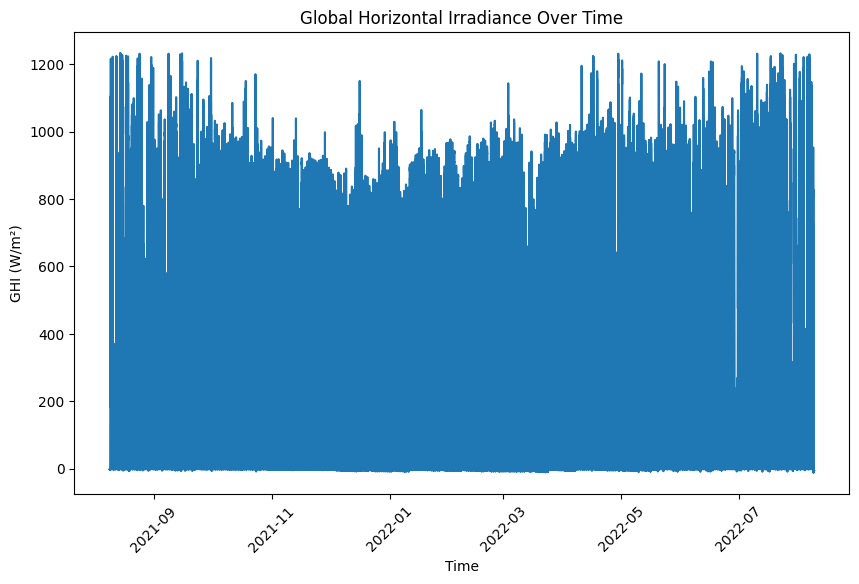

In [11]:
## Time-Series Plot:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['GHI'])
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.title('Global Horizontal Irradiance Over Time')
plt.xticks(rotation=45)
plt.show()


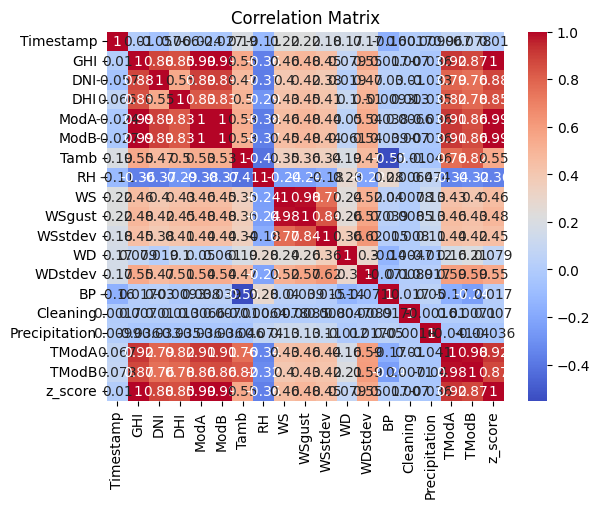

In [13]:
## Correlation Analysis:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


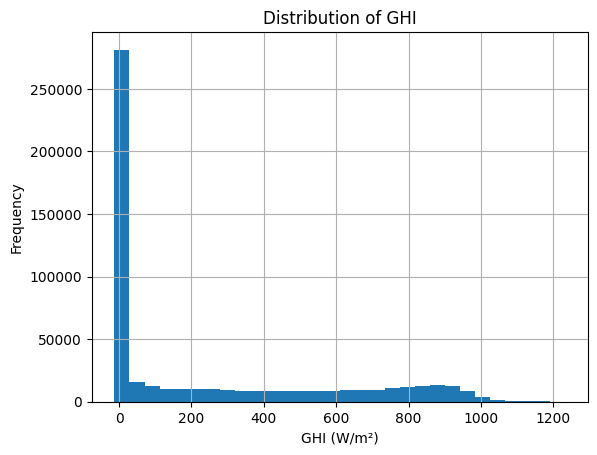

In [14]:
## Histograms:
df['GHI'].hist(bins=30)
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.title('Distribution of GHI')
plt.show()


In [15]:
#  Data Cleaning

In [16]:
## Drop Duplicates:
df = df.drop_duplicates()


In [18]:
## Save Cleaned Data:
df.to_csv('cleaned_benin-malanville_data.csv', index=False)
